In [1]:
#영화리뷰 분류
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

np.random.seed(7)

top_words = 5000 #상위 단어 5000개
#학습용, 검증용 5:5
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
print(X_train.shape)
print(X_test.shape)
print(X_train[0])
max_review_length = 500 #리뷰의 최대 길이를 500으로 설정
#길이가 짧으면 공백으로 채움
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
print(X_train.shape)
print(X_test.shape)
print(X_train[0])

(25000,)
(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]
(25000, 500)
(25000, 500)
[   0    0    0    0    0    0 

In [2]:
from tensorflow.keras.models import Sequential
from keras.layers.embeddings import Embedding
#Embedding(단어의 개수, 벡터크기, 입력사이즈(최대 단어 개수))
model = Sequential()
#각 단어에 대한 정수 인코딩
words = {'I':0, 'am':1, 'a':2, 'boy':3}
#keras 신겸앙에 word2vec 벡터를 입력하는 방법
model.add(Embedding(5,1,input_length=1))
#model.compile(loss='binary_crossentory', optimizer='adam', metrics=['accuracy'])

#가중치 값
embeddings = model.layers[0].get_weights()[0]
words_embeddings = {w:embeddings[idx] for w, idx in words.items()}
print(words_embeddings)
print(words_embeddings['boy'])

{'I': array([-0.0497725], dtype=float32), 'am': array([-0.00416895], dtype=float32), 'a': array([0.03167988], dtype=float32), 'boy': array([0.00704954], dtype=float32)}
[0.00704954]


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers.embeddings import  Embedding

#create the model
embedding_vector_length = 32 #벡터사이즈
model = Sequential()
#임베딩 레이어 Embedding(단어의 개수, 벡터크기, 입력사이즈(최대단어사이즈))
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))

#문장을 단어들의 시퀀스로 간주하고 순환 레이어의 입력으로
model.add(LSTM(100)) # Long Short-Term Memory
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
hist = model.fit(X_train[:1000], y_train[:1000], epochs=10, batch_size=64)

Epoch 1/10
16/16 [==============================] - 2s 38ms/step - loss: 0.6933 - accuracy: 0.5060
Epoch 2/10
16/16 [==============================] - 0s 31ms/step - loss: 0.6841 - accuracy: 0.6690
Epoch 3/10
16/16 [==============================] - 1s 33ms/step - loss: 0.6593 - accuracy: 0.7650
Epoch 4/10
16/16 [==============================] - 1s 33ms/step - loss: 0.4979 - accuracy: 0.7990
Epoch 5/10
16/16 [==============================] - 1s 31ms/step - loss: 0.3189 - accuracy: 0.8830
Epoch 6/10
16/16 [==============================] - 1s 31ms/step - loss: 0.2007 - accuracy: 0.9420
Epoch 7/10
16/16 [==============================] - 0s 31ms/step - loss: 0.1011 - accuracy: 0.9730
Epoch 8/10
16/16 [==============================] - 1s 34ms/step - loss: 0.0856 - accuracy: 0.9780
Epoch 9/10
16/16 [==============================] - 1s 33ms/step - loss: 0.0508 - accuracy: 0.9910
Epoch 10/10
16/16 [==============================] - 0s 31ms/step - loss: 0.0653 - accuracy: 0.9840


In [8]:
# Final evaluation of the model
scores = model.evaluate(X_train[:1000], y_train[:1000], verbose=1)
print('Accuracy: %.2f%%' % (scores[1]*100))

scores = model.evaluate(X_test[:1000], y_test[:1000], verbose=1)
print('Accuracy: %.2f%%' % (scores[1] * 100))

32/32 [==============================] - 1s 18ms/step - loss: 0.0416 - accuracy: 0.9970
Accuracy: 99.70%
32/32 [==============================] - 0s 9ms/step - loss: 0.6119 - accuracy: 0.7590
Accuracy: 75.90%


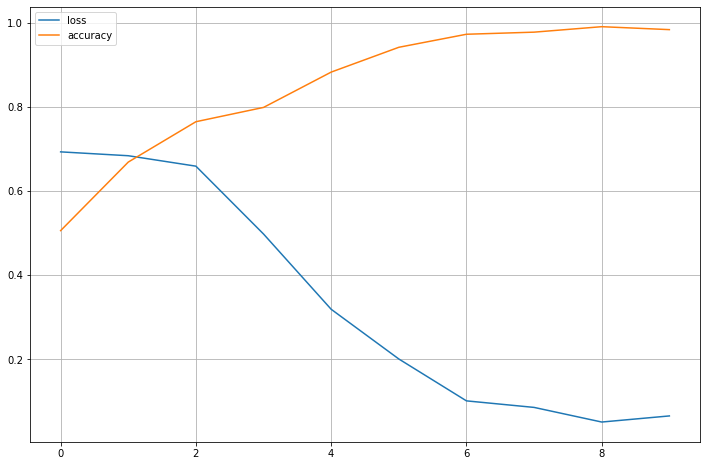

In [9]:
#모델 학습 과정 표시
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) #손실
plt.plot(hist.history['accuracy']) #정확도
plt.legend(['loss', 'accuracy'])
plt.grid()
plt.show()

In [10]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           160000    
                                                                 
 lstm_1 (LSTM)               (None, 100)               53200     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
